# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 2: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Elnaz | Gholizadeh | Elnaz Gholizadeh September 27 2024 | 10 | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

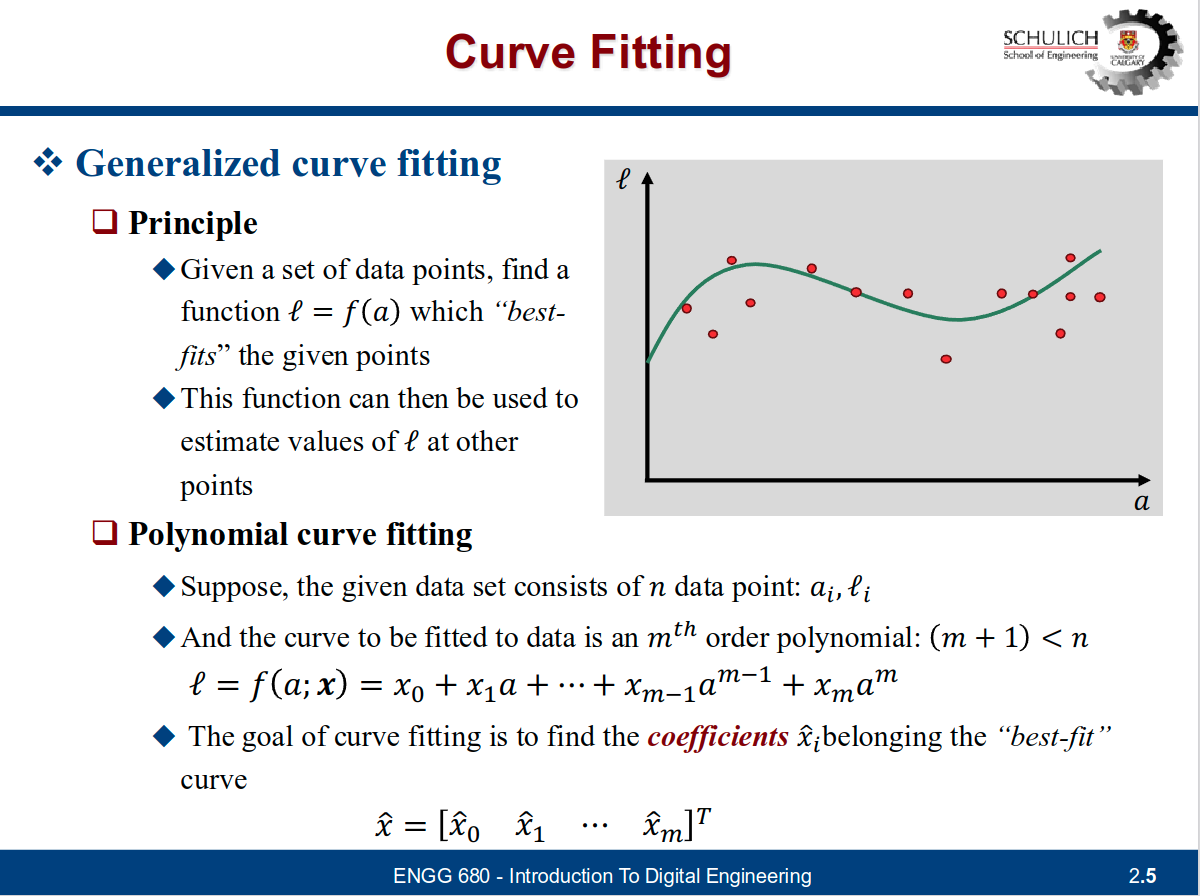

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

---

\

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = np.array(df_data)


#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]


In [8]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
# I changed this to -1 and 1 instead of pi because it wasn't making sense later on.
start = -1
end = 1
a = np.linspace(start, end, n)


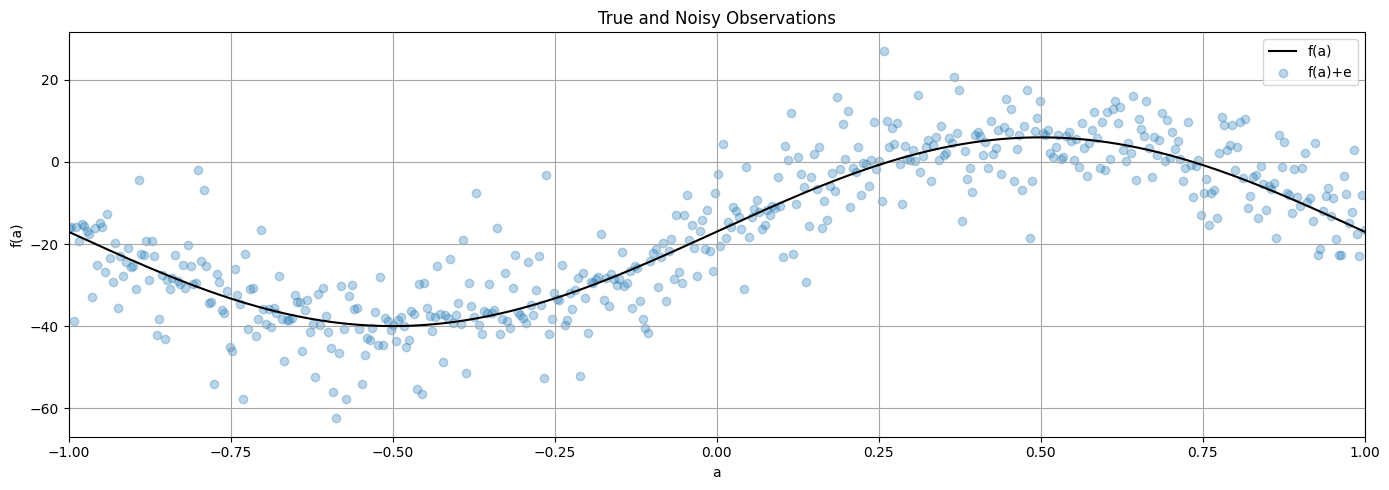

In [9]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

x=np.linspace(-1,1,len(l_true))

plt.plot(x,l_true,label='f(a)',color='k')

plt.scatter(x,l,label='f(a)+e',color='tab:blue',marker='o',alpha=0.3)

plt.legend(loc='best')
plt.xlabel('a')
plt.ylabel('f(a)')
plt.title('True and Noisy Observations')

plt.xlim([-1, 1])

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [10]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    #A Matrix
    A = np.ones((len(a), deg + 1))
    for i in range(1,deg + 1):
        A[:, i] = a ** i

    #x equations
    A_T_P_A_inverse=np.linalg.inv(np.dot(np.dot(A.T,P),A))
    A_T_P_l=np.dot(np.dot(A.T,P),l)
    x=np.dot(A_T_P_A_inverse,A_T_P_l)

    #residuals
    v = l- np.dot(A, x)

    #apv
    apv=np.dot(np.dot(v.T, P), v) / (n - (deg + 1))

    #covariance
    cov_x=apv * A_T_P_A_inverse

    return x, cov_x, apv, v


In [11]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
x1, cov_x1, apv1, v1=fit_polynomial_curve(a,l,P,1)
x3, cov_x3, apv3, v3=fit_polynomial_curve(a,l,P,3)
x5, cov_x5, apv5, v5=fit_polynomial_curve(a,l,P,5)


In [12]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
#yeah i had the data backwards fml
# (1 marks)

line_uw = np.polyval(x1[::-1],a)
cubic_uw = np.polyval(x3[::-1],a)
quintic_uw = np.polyval(x5[::-1],a)

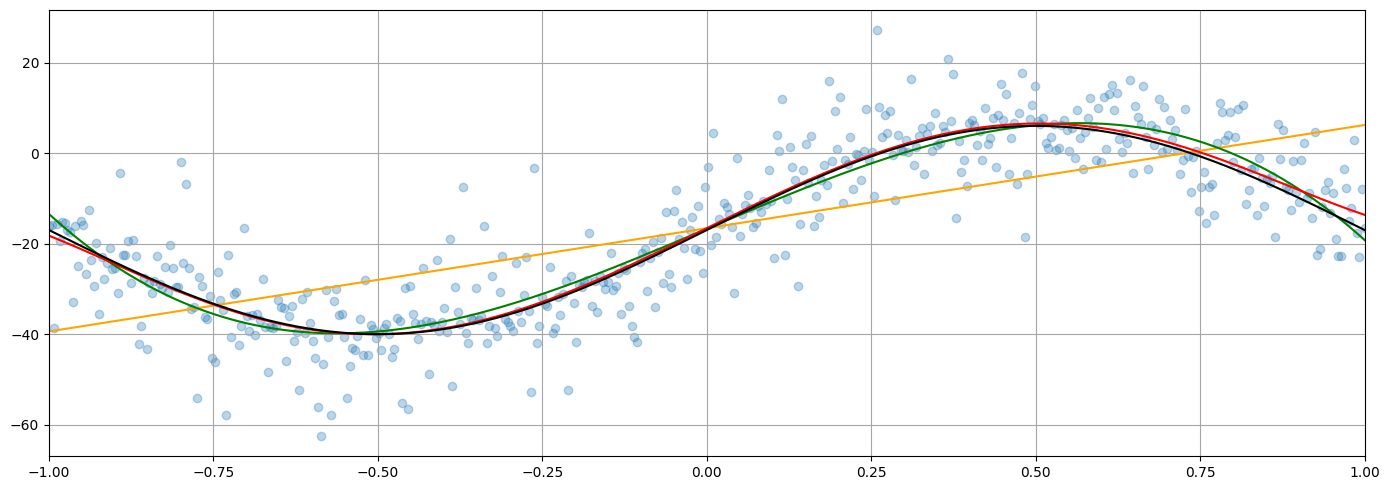

In [13]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.plot(a,line_uw,color='orange')
plt.plot(a,cubic_uw,color='green')
plt.plot(a,quintic_uw,color='red')

plt.scatter(a,l, color='tab:blue', marker='o',alpha=0.3)

plt.plot(a,l_true, color='k')

plt.xlim([-1, 1])


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [14]:
# step 9
# print the a posteriori variance factor for each polynomial function
# (3 marks)
print("a posteriori variance factor for degree 1: %.2f" % apv1)
print("a posteriori variance factor for degree 3: %.2f" % apv3)
print("a posteriori variance factor for degree 5: %.2f" % apv5)

a posteriori variance factor for degree 1: 162.74
a posteriori variance factor for degree 3: 66.13
a posteriori variance factor for degree 5: 63.76


In [15]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

def normCalculator(matrix):
    delta=matrix-l_true
    delta_squared=np.square(delta)
    sum_delta_squared=np.sum(delta_squared)
    norm=np.sqrt(sum_delta_squared)
    return norm

print("Norm1 matrix: %.2f" %normCalculator(line_uw))
print("Norm3 matrix: %.2f" %normCalculator(cubic_uw))
print("Norm5 matrix: %.2f" %normCalculator(quintic_uw))

Norm1 matrix: 229.06
Norm3 matrix: 38.29
Norm5 matrix: 17.37


In [16]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
"""The variance decreases as the polynomial degree increases, as we would expect, indicating the curve is a better fit
 The norm also decreases, indicating the fit is getting better. """


'The variance decreases as the polynomial degree increases, as we would expect, indicating the curve is a better fit\n The norm also decreases, indicating the fit is getting better. '

In [17]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1/l_var)
print(P)

[[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


a weighted posteriori variance factor for degree 1: 12.05
a weighted posteriori variance factor for degree 3: 1.14
a weighted posteriori variance factor for degree 5: 0.94
Weighted norm1 matrix: 230.68
Weighted norm3 matrix: 36.07
Weighted norm5 matrix: 5.74


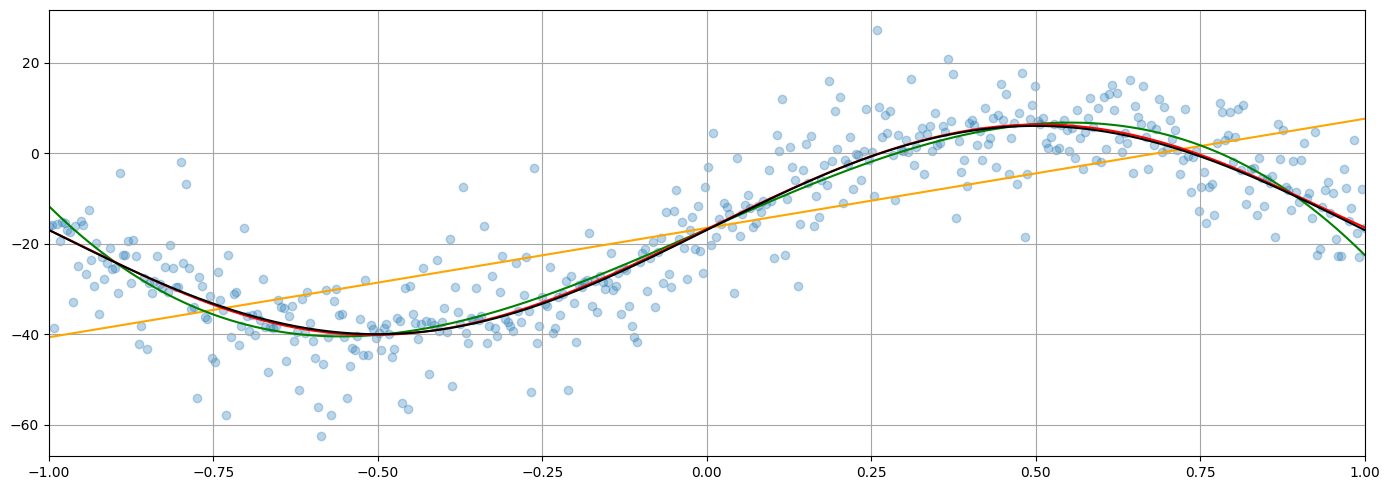

In [18]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
x1, cov_x1, apv1, v1=fit_polynomial_curve(a,l,P,1)
x3, cov_x3, apv3, v3=fit_polynomial_curve(a,l,P,3)
x5, cov_x5, apv5, v5=fit_polynomial_curve(a,l,P,5)

line_uw = np.polyval(x1[::-1],a)
cubic_uw = np.polyval(x3[::-1],a)
quintic_uw = np.polyval(x5[::-1],a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
plt.plot(a,line_uw,color='orange')
plt.plot(a,cubic_uw,color='green')
plt.plot(a,quintic_uw,color='red')
plt.scatter(a,l, color='tab:blue', marker='o',alpha=0.3)
plt.plot(a,l_true, color='k')
plt.xlim([-1, 1])
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

print("a weighted posteriori variance factor for degree 1: %.2f" % apv1)
print("a weighted posteriori variance factor for degree 3: %.2f" % apv3)
print("a weighted posteriori variance factor for degree 5: %.2f" % apv5)

print("Weighted norm1 matrix: %.2f" %normCalculator(line_uw))
print("Weighted norm3 matrix: %.2f" %normCalculator(cubic_uw))
print("Weighted norm5 matrix: %.2f" %normCalculator(quintic_uw))


In [19]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# The apv decreased with the weighted LSE and so did the norm. This indicates a better fit again

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

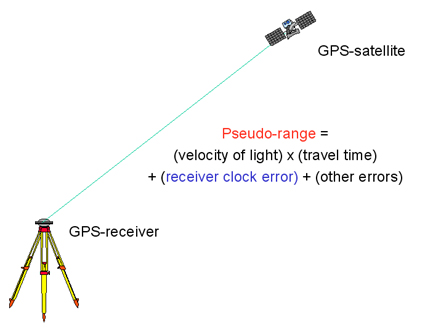

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [622]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx',header=0)
df_sat_pos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx',header=0)

pseudorange = df_pseudorange.to_numpy()[:,1]# this was easier than changing everything later on
sat_pos = df_sat_pos.to_numpy()[:,1:]

In [623]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = sat_pos.shape[0]
m = 4   #x,y,z & cdT

In [624]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [625]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [626]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [627]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()#initial estimated states array[1x4]

In [628]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  diff = satellite_pos[:, :3] - receiver_pos
  distance = np.zeros(diff.shape[0])
  for i in range(diff.shape[0]):
    distance[i] = np.linalg.norm(diff[i])
  return distance

In [629]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    A=np.ones([s_pos.shape[0],4])

    for i in range(s_pos.shape[0]):
      for j in range(3):
        A[i, j] = -(s_pos[i, j] - r_pos[j]) / rho[i]
    return A

In [630]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

while np.any(delta[:3]>=0.001) and i<10000: #this wasn't stated but i felt like it shouldve been

       # compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange - rho

       # compute the corrections delta
       # (1 marks)
       A_T_P_A = np.dot(np.dot(A.T, P), A)
       A_T_P_A_inverse = np.linalg.pinv(A_T_P_A)  # Use pseudo-inverse

       A_T_P_w = np.dot(np.dot(A.T, P), w)
       delta = np.dot(A_T_P_A_inverse, A_T_P_w)

       # update the states
       # (1 marks)
       x_hat += delta[:4]

       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(np.linalg.norm(w))
       arr_delta.append(np.linalg.norm(delta))
       arr_err_pos.append(err_pos)
       arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = np.dot(w.T, np.dot(P, w)) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * A_T_P_A_inverse

In [645]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
np.set_printoptions(precision=3, suppress=True)
output=f"""
Estimated States:
----------------------------------------------------
{x_hat}

Corrections Array:
------------------------------
{delta}

Estimated Measurement Residuals (w):
--------------------------------------------------------------------
{w}

A Posteriori Variance of Unit Weight (APV):
-------------------------------------------
{apv:.3f}

Covariance Matrix of Estimated States:
--------------------------------------
{C_x_hat}

Number of Iterations:
---------------------
{i}

3-D Position Error (last iteration):
-----------------------------------
{arr_err_pos[-1]:.3f} meters
"""
# (7 marks)
print(output)


Estimated States:
----------------------------------------------------
[-1633492.445 -3651629.542  4952485.433  1266156.46 ]

Corrections Array:
------------------------------
[ 0.     0.    -0.     6.472]

Estimated Measurement Residuals (w):
--------------------------------------------------------------------
[6.732 6.583 5.373 6.467 6.672 5.054 6.381 7.984 6.736 7.083 6.127]

A Posteriori Variance of Unit Weight (APV):
-------------------------------------------
66.708

Covariance Matrix of Estimated States:
--------------------------------------
[[ 21.323   4.647  -5.642  -4.874]
 [  4.647  28.382 -38.762 -24.566]
 [ -5.642 -38.762 136.458  73.647]
 [ -4.874 -24.566  73.647  46.646]]

Number of Iterations:
---------------------
5

3-D Position Error (last iteration):
-----------------------------------
5.432 meters



In [632]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
"""The APV is high indicating a high level of noise or model mismatch,
suggesting room for improvement.
The Covariance Matrix shows significant uncertainty in the z co-ordinate
though the error of 5.432 meters is pretty low"""

'the variance is very close to 1,\n  indicating that the residuals are\n   within the expected range of noise. \n   The model is well-calibrated'

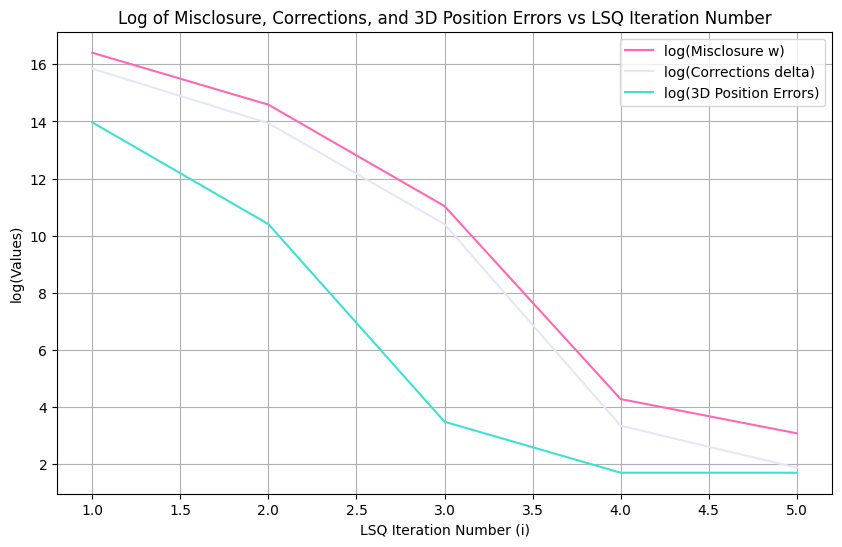

In [650]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total).
#Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(arr_w), label="log(Misclosure w)", color='#FF69B4')


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, np.log(arr_delta), label="log(Corrections delta)", color='#E6E6FA')

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.plot(arr_i, np.log(arr_err_pos), label="log(3D Position Errors)", color='#40E0D0')

plt.title('Log of Misclosure, Corrections, and 3D Position Errors vs LSQ Iteration Number')
plt.xlabel('LSQ Iteration Number (i)')
plt.ylabel('log(Values)')

plt.legend()
plt.grid(True)

In [651]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
"""log of the misclosure w against the LSQ iteration number i:
    Decreases rapidly, meaning that the difference
    between observed and estimated measurements was minimized early
    on and stabilized toward convergence.
log of the corrections delta against the LSQ iteration number i:
    The corrections steadily decreased, indicating that the changed
    to the estimated states became smaller as the model converged
    to the correct number.
log of the 3D position errors against the LSQ iteration number i:
    The 3D position error dropped quickly in the first iterations,
    meaning that the receiver estimate improved pretty
    early on in the process.
"""

'log of the misclosure w against the LSQ iteration number i:\n    Decreases rapidly, meaning that the difference\n    between observed and estimated measurements was minimized early\n    on and stabilized toward convergence.\nlog of the corrections delta against the LSQ iteration number i:\n    The corrections steadily decreased, indicating that the changed\n    to the estimated states became smaller as the model converged\n    to the correct number.\nlog of the 3D position errors against the LSQ iteration number i:\n    The 3D position error dropped quickly in the first iterations,\n    meaning that the receiver estimate improved pretty\n    early on in the process.\n'

In [635]:
# this is just for fun (no marks allocated)
# now you can estimate the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
